<a href="https://colab.research.google.com/github/mayuresh25027/story/blob/master/Intenship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **InternShip Studio Final Project**

> # **Youtube adview Prediction**

## **Probelm Statement :**
> **To build a machine learning regression to predict youtube adview count based
on other youtube metrics.**


## **WorkFlow**

1. Import the datasets and libraries, check shape and datatype.
2. Visualise the dataset using plotting using heatmaps and plots. You
can study data distributions for each attribute as well.
3. Clean the dataset by removing missing values and other things.
4. Transform attributes into numerical values and other
necessary transformations
5. Normalise your data and split the data into training, validation and test
set in the appropriate ratio.
6. Use linear regression, Support Vector Regressor for training and get
errors.
7. Use Decision Tree Regressor and Random Forest Regressors.
8. Build an artificial neural network and train it with different layers
and hyperparameters. Experiment a little. Use keras.
9. Pick the best model based on error as well as
generalisation.
10.Save your model and predict on the test set.
Project : Youtube adview Pred

## DataSet :
> The file train.csv contains metrics and other details of about 15000 youtube
videos. The metrics include number of views, likes, dislikes, comments and
apart from that published date, duration and category are also included.

**Data** : 
> https://drive.google.com/file/d/1Dv-HF10AUUA03AO_cQvar462eXawk0iQ/view?usp=sharing

# **1.Importing DataSet**
>Importing Dataset, Libraries adn Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# model for test train split
from  sklearn.model_selection import train_test_split
# for Normaliazing the Train test split
from sklearn.preprocessing import MinMaxScaler
# for encoding the label
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

# Prediction Models 
# Linear regession
from sklearn import linear_model

# SVM 
from sklearn.svm import SVR

# Desision Tree
from sklearn.tree import DecisionTreeRegressor

# Random Forest regerssor 
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import ExtraTreesClassifier


import tensorflow as tf

In [ ]:
data = pd.read_csv("train.csv")
data.head(5)


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
data.describe()

,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


In [ ]:
data.shape

(14999, 9)

In [ ]:
data.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

**Data Description** 
* `vidid` : Unique Identification ID for each video
* `adview` : The number of adviews for each video
* `views` : The number of unique views for each video
* `likes` : The number of likes for each video
* `dislikes` : The number of dislikes for each video
* `comment` : The number of unique comments for each video
* `published` : The data of uploading the video
* `duration` : The duration of the video (in min. and seconds)
* `category` : Category niche of each of the video


In [ ]:
category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5,'F':6, 'G':7, 'H':8}
data["category"] = data["category"].map(category)
data.category






0        6
1        4
2        3
3        8
4        4
        ..
14994    1
14995    4
14996    2
14997    7
14998    4
Name: category, Length: 14999, dtype: int64

In [ ]:
data.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category      int64
dtype: object

In [ ]:
# We Removed all the values that were'e wrong!!!!!!!
data = data[data.views != 'F']
data = data[data.adview  != 'F']
data = data[data.likes != 'F']
data = data[data.dislikes != 'F']
data = data[data.comment != 'F']


In [ ]:
data.shape

(14637, 9)

In [ ]:
data

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,1
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,4
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,2
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,7


In [ ]:
import re
j=1
arr = []
for i in data.duration:
  match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', i)
  (hours, minutes, seconds) = [ int(n or 0) for n in match.groups() ]
  A=hours*60*60+ minutes*60+ seconds
  arr.append(A)


data["Time-in-sec"] = arr
data.head(5)

,vidid,adview,views,likes,dislikes,comment,published,duration,category,Time-in-sec
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6,457
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4,570
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3,136
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8,262
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4,31


## **Visualization**


Realtion between 



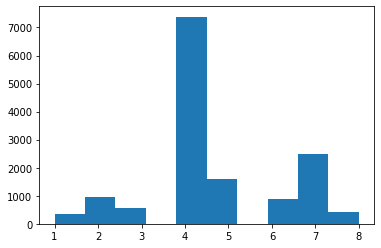

In [ ]:
plt.hist(data["category"])
plt.show()


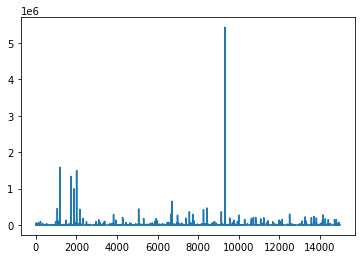

In [ ]:

plt.plot(data["adview"])
plt.show()


In [ ]:
data = data[data["adview"]<2000000]

**Encoding The Data like Published VidId etc**

In [ ]:
# LabelEncoder()

data["published"] = LabelEncoder().fit_transform(data["published"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Now we Will Be converting the datatypes  objects to int**

In [ ]:
data["views"] = data["views"].astype(int);
data["likes"] = data["likes"].astype(int);
data["dislikes"] = data["dislikes"].astype(int);
data["comment"] = data["comment"].astype(int);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
data.dtypes

vidid          object
adview          int64
views           int64
likes           int64
dislikes        int64
comment         int64
published       int64
duration       object
category        int64
Time-in-sec     int64
dtype: object

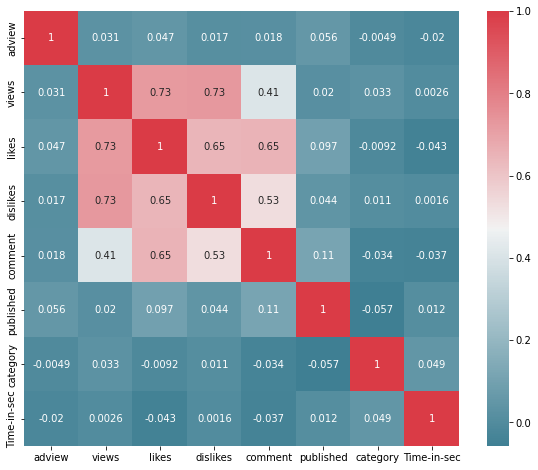

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()


In [ ]:
new_data = data.drop("duration",axis = 1)

In [ ]:

new_data.head(5)

,vidid,adview,views,likes,dislikes,comment,published,category,Time-in-sec
0,VID_18655,40,1031602,8523,363,1095,2168,6,457
1,VID_14135,2,1707,56,2,6,2185,4,570
2,VID_2187,1,2023,25,0,2,2094,3,136
3,VID_23096,6,620860,777,161,153,2119,8,262
4,VID_10175,1,666,1,0,0,2091,4,31


In [ ]:
X_data = new_data.drop(["adview" , "vidid","category"],axis = 1)
X_data.head(5)

,views,likes,dislikes,comment,published,Time-in-sec
0,1031602,8523,363,1095,2168,457
1,1707,56,2,6,2185,570
2,2023,25,0,2,2094,136
3,620860,777,161,153,2119,262
4,666,1,0,0,2091,31


In [ ]:
y_data =new_data["adview"]
y_data.head(5)

0    40
1     2
2     1
3     6
4     1
Name: adview, dtype: int64

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_data , y_data, test_size = 0.2,random_state = 42)

###Feature Selection : 
While Experimenting We Found That The Metrics Scores Were Too High to consider the model as an ideal model 

the scores Found were as follows : 
1. for SVR
* Mean Absolute error :  1697.3862412871738
* Mean Squared  error :  833681917.0467141
* Root Mean Squared Error :  28873.550475248347

2. Multiple Linear Regression
* Mean Absolute error :  12378779373.669933
* Mean Squared  error :  2.9072983631038104e+21
* Root Mean Squared Error :  53919369090.37244

3. For Descision Tree
* Mean Absolute error :  1738.613387978142
* Mean Squared  error :  833500634.5382514
* Root Mean Squared Error :  28870.41105592803

4. For Randomforest Regression 
* Mean Absolute error :  83537.84596653006
* Mean Squared  error :  8414792332.288778
* Root Mean Squared Error :  91732.17719147833

In [ ]:
# Feature Selection

feature_names = [f"feature {i}" for i in range(X_data.shape[1])]
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.048 seconds


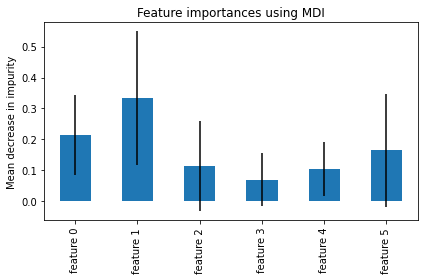

In [ ]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**ThereFore We Drop Feature 5 ie. Category** 

###Lets make  a disctionary which will print the
* `Mean Absolute error`
* `Mean Squraed Error`
* `Root Mean Square Error`

In [ ]:
# Evalaation Metrices 

def met_error(X_test , y_test, model):
    """
    This function Shows The three metrices scores of the model 
    """
    pred_model = model.predict(X_test)
    print("Mean Absolute error : ", metrics.mean_absolute_error(y_test,pred_model))
    print("Mean Squared  error : ", metrics.mean_squared_error(y_test,pred_model))
    print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test,pred_model)))


In [ ]:
# Linear regression

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train,y_train)
met_error(X_test,y_test,linear_regression)

Mean Absolute error :  3554.720073446563
Mean Squared  error :  831568809.6915021
Root Mean Squared Error :  28836.934817894606


In [ ]:
# Support Vector Machine 

supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
met_error(X_test,y_test,supportvector_regressor)

Mean Absolute error :  1696.9071974987405
Mean Squared  error :  833685358.5433981
Root Mean Squared Error :  28873.610071194737


In [ ]:
# Decision Tree Regressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
met_error(X_test,y_test,decision_tree)

Mean Absolute error :  3701.3903688524592
Mean Squared  error :  2298540960.9402323
Root Mean Squared Error :  47943.1012862146


In [ ]:
# Random Forest regressor 

RF_reg = RandomForestRegressor(n_estimators = 200, max_depth = 25, min_samples_split=15)
RF_reg.fit(X_train,y_train)

met_error(X_test,y_test,RF_reg)


Mean Absolute error :  3022.9045249024334
Mean Squared  error :  699275374.4692751
Root Mean Squared Error :  26443.815429496462



**From The Above we Can see That Currently Random Forest regressior is our Best Fit Model**  

In [ ]:
X_train

,views,likes,dislikes,comment,published,Time-in-sec
13440,86739,117,9,4,1217,180
9523,1419766,887,362,232,1547,5811
3012,26086,19,0,9,966,178
1888,305445,3662,45,555,1484,257
11378,737649,1702,96,53,1127,895
...,...,...,...,...,...,...
5316,31648,140,24,14,1925,231
13748,1804,4,1,0,1049,232
5522,204817,86,35,11,1237,218
883,1361366,1384,757,185,2145,240


In [ ]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer = tf.keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
met_error(X_test,y_test,ann)


Epoch 1/100
366/366 [==============================] - 4s 4ms/step - loss: 991406016.0000 - mean_squared_error: 991406016.0000
Epoch 2/100
366/366 [==============================] - 1s 4ms/step - loss: 958684224.0000 - mean_squared_error: 958684224.0000
Epoch 3/100
366/366 [==============================] - 1s 4ms/step - loss: 3036761088.0000 - mean_squared_error: 3036761088.0000
Epoch 4/100
366/366 [==============================] - 1s 4ms/step - loss: 2640446976.0000 - mean_squared_error: 2640446976.0000
Epoch 5/100
366/366 [==============================] - 1s 4ms/step - loss: 786518336.0000 - mean_squared_error: 786518336.0000
Epoch 6/100
366/366 [==============================] - 1s 4ms/step - loss: 890117888.0000 - mean_squared_error: 890117888.0000
Epoch 7/100
366/366 [==============================] - 1s 4ms/step - loss: 794188928.0000 - mean_squared_error: 794188928.0000
Epoch 8/100
366/366 [==============================] - 1s 4ms/step - loss: 798904960.0000 - mean_squared_er

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [ ]:
#TESTING
data_test = pd.read_csv("test.csv")

In [ ]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
from keras.models import load_model
model = load_model("ann_youtubeadview.h5")

In [ ]:
# Removing character "F" present in data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [ ]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [ ]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [ ]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("test.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,457,2
1,3444,1040132,8171,340,1047,1825,570,6
2,1593,28534,31,11,1,1009,136,4
3,3775,1316715,2284,250,274,116,262,7
4,7644,1893173,2519,225,116,1892,31,2


In [ ]:
data_test["Time-in-sec"] = data_test["duration"]

data_test=data_test.drop(["vidid","duration"],axis = 1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category,Time-in-sec
0,440238,6153,218,1377,2053,457,2,457
1,1040132,8171,340,1047,1825,570,6,570
2,28534,31,11,1,1009,136,4,136
3,1316715,2284,250,274,116,262,7,262
4,1893173,2519,225,116,1892,31,2,31


In [ ]:
|from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
df=pd.DataFrame(prediction)
df.info()

In [ ]:
df.head()

In [ ]:
#prediction.to_csv('predictions.csv')
print(df)

In [ ]:
df.to_csv('prediction.csv', index=False)
df.to_excel('prediction.xls', index=False)